<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/EDA_%26_Price_Prediction_of_Laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/laptop_data.csv')

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

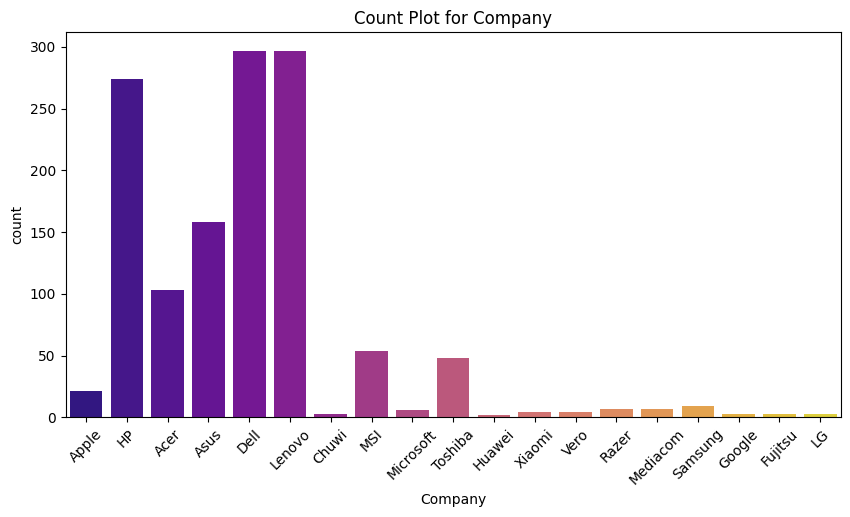

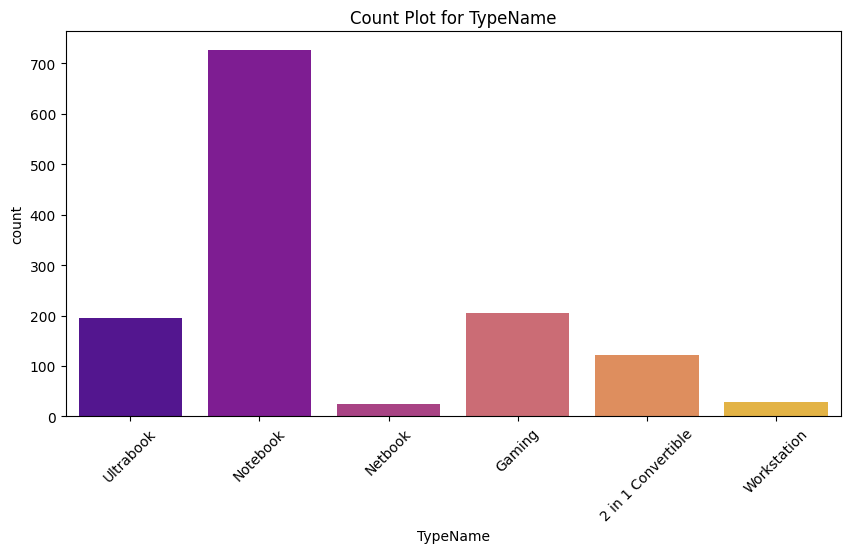

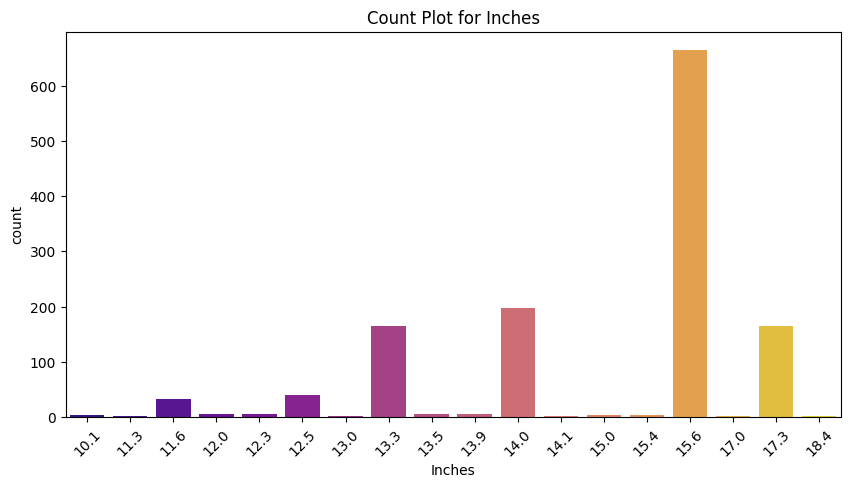

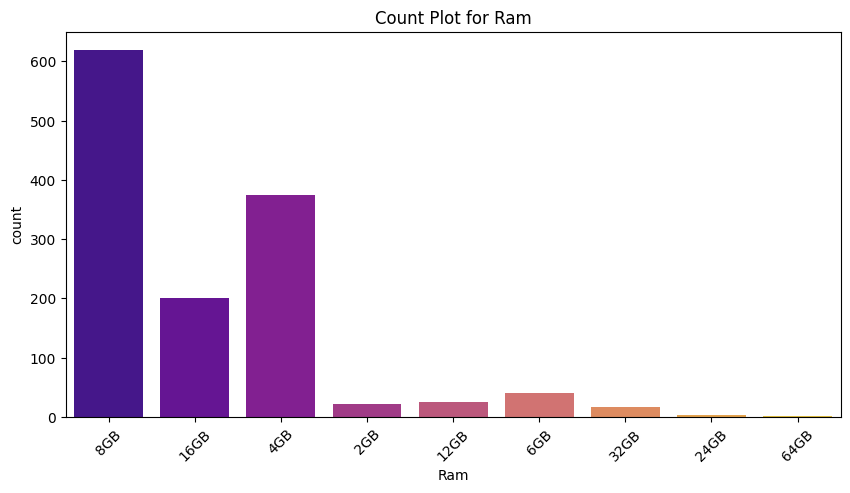

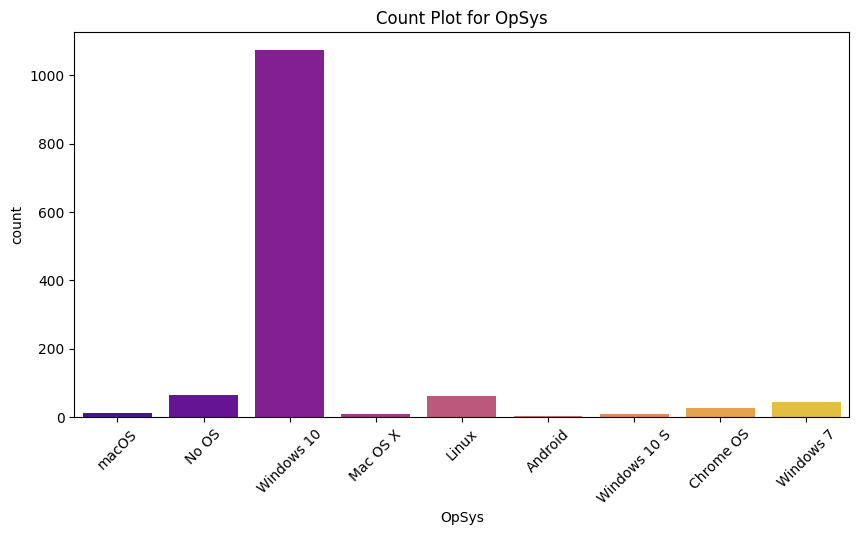

In [11]:
def plot_countplot(data, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, palette='plasma')
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation = 45)
    plt.show()

columns = ['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

for col in columns:
    plot_countplot(df, col)


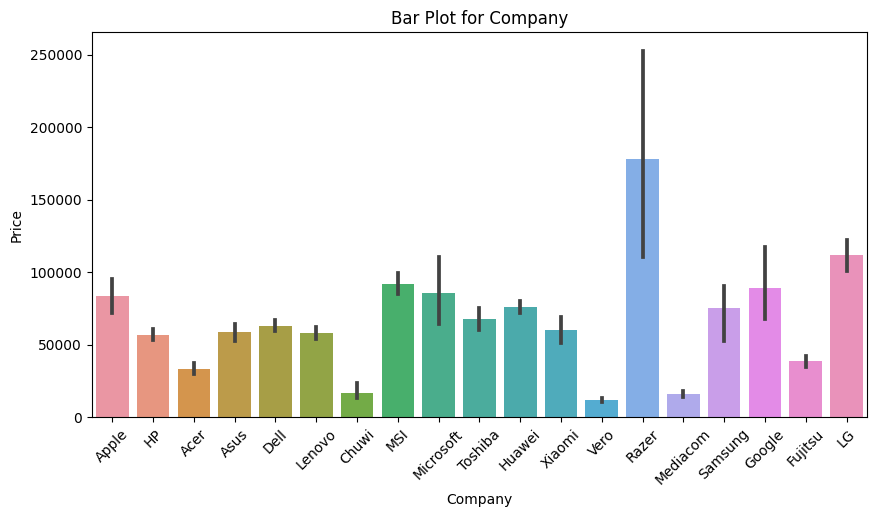

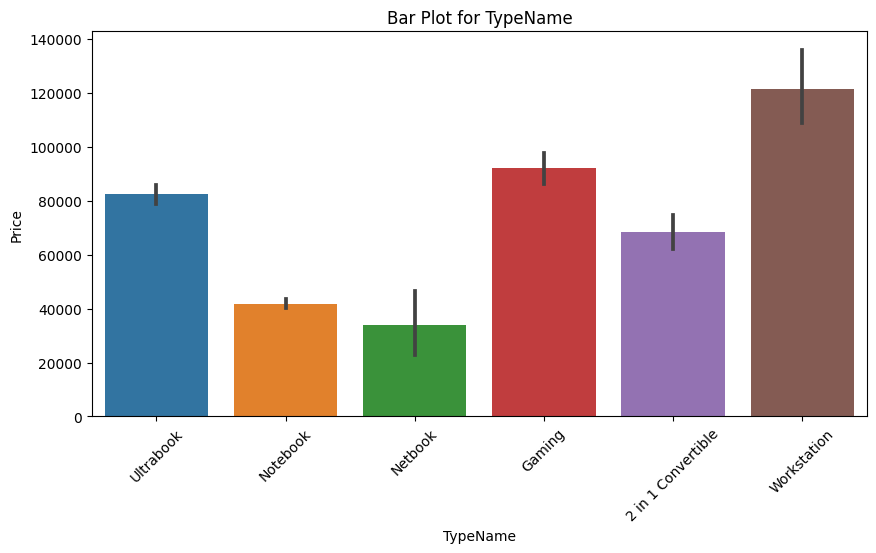

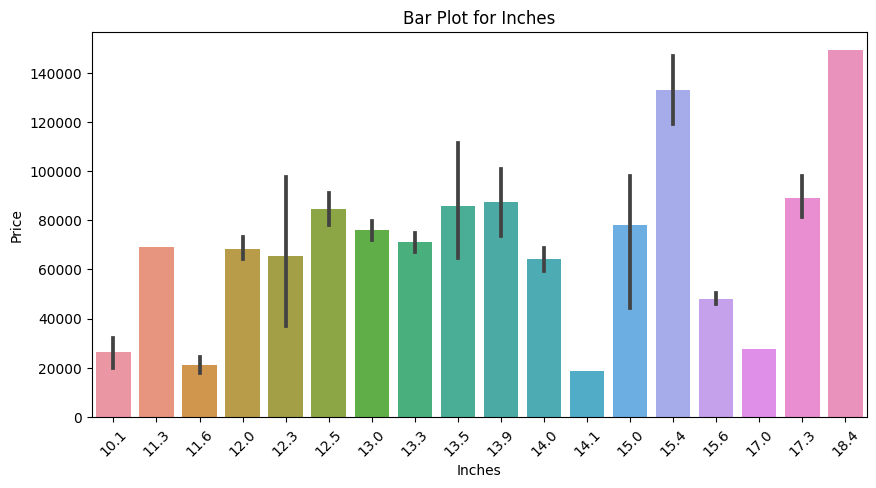

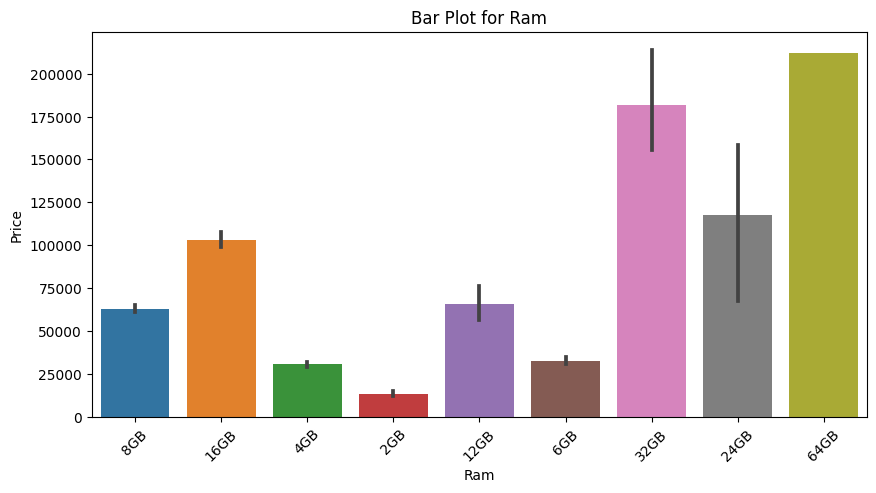

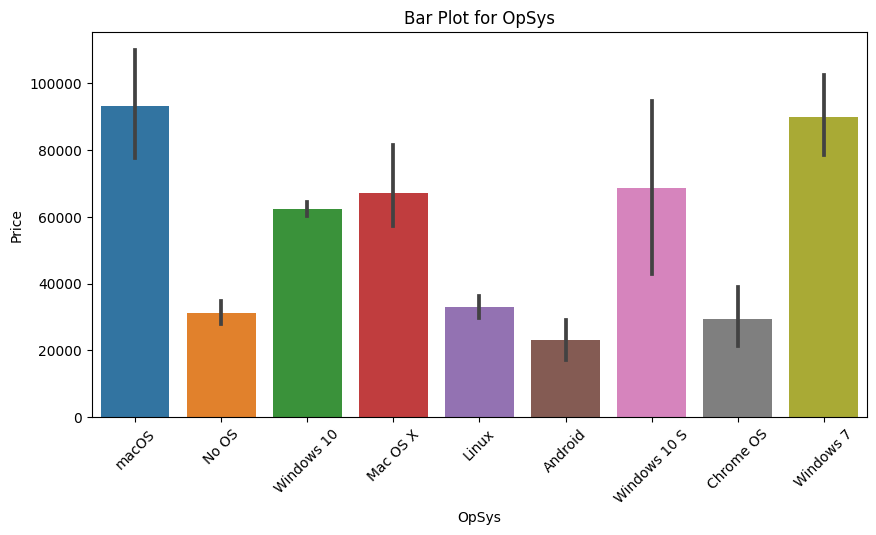

In [12]:
def plot_barplot(df, col):
  plt.figure(figsize = (10,5))
  sns.barplot(x = df[col], y = df['Price'])
  plt.xticks(rotation = 45)
  plt.title(f'Bar Plot for {col}')
  plt.show()

columns = ['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

for col in columns:
  plot_barplot(df, col)


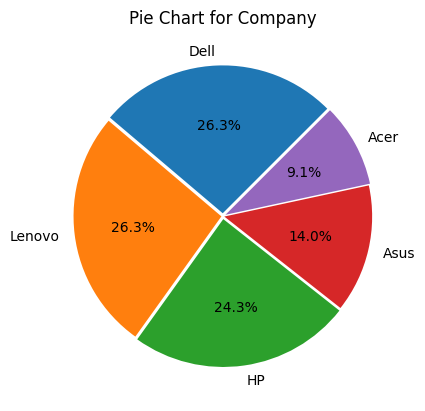

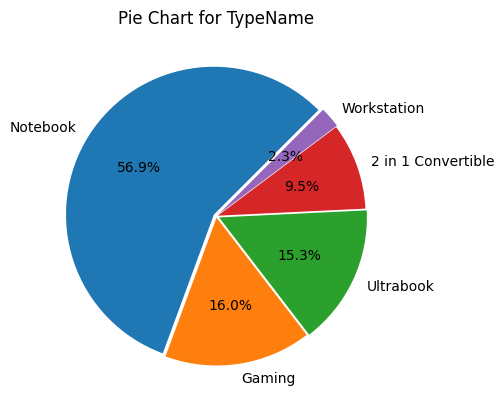

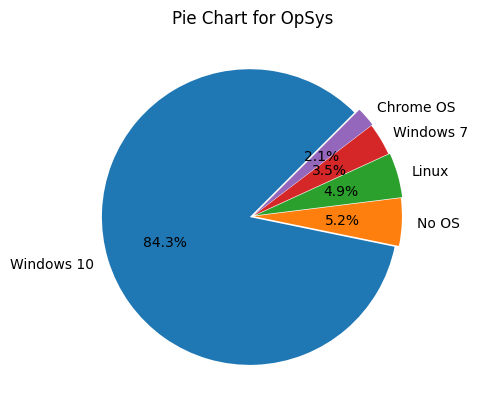

In [13]:
def plot_pieplot(data, column):
    counts = data[column].value_counts().head(5)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode = [0.02,0.01,0.02,0.01,0.02], startangle = 45)
    plt.title(f'Pie Chart for {column}')
    plt.show()

columns = ['Company', 'TypeName', 'OpSys']

for col in columns:
    plot_pieplot(df, col)


In [14]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

<ipython-input-15-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

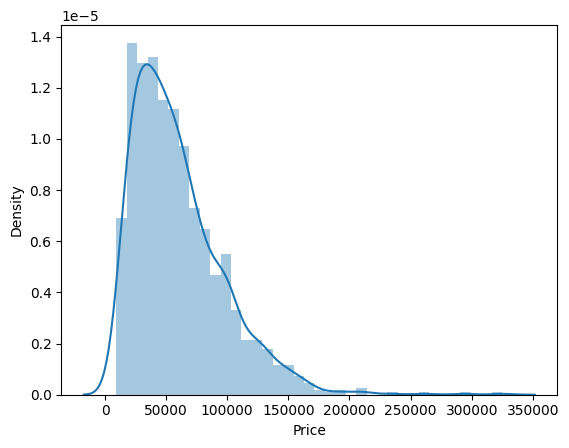

In [15]:
sns.distplot(df['Price'])

<ipython-input-16-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

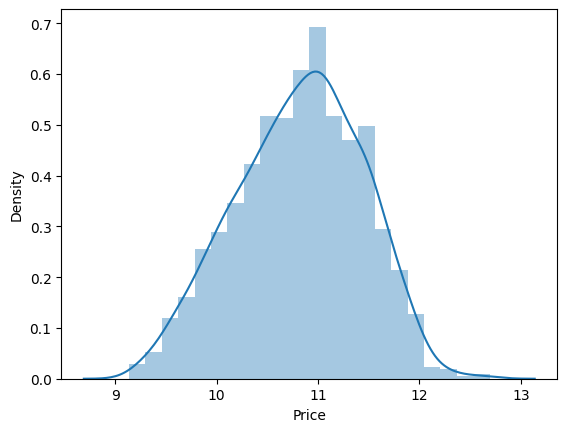

In [16]:
sns.distplot(np.log(df['Price']))

Now its uniformally distributed

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['TypeName'] = le.fit_transform(df['TypeName'])

In [18]:
df['Company'].value_counts()

4     297
10    297
7     274
2     158
0     103
11     54
16     48
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
5       3
9       3
8       2
Name: Company, dtype: int64

In [19]:
# Extract integer values from the 'Ram' column
df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(int)

In [20]:
df['Weight'] = df['Weight'].str.extract(r'(\d+\.\d+)').astype(float)

In [21]:
df['Price'] = np.log(df['Price'])

In [22]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [23]:
res = df['ScreenResolution'].str.split('x').tolist()

In [24]:
width = [int(i[0]) for i in res]
length = [int(i[1]) for i in res]

In [25]:
# Create a DataFrame from the extracted data
df1 = pd.DataFrame({'Width': width, 'Length': length})

In [26]:
df = pd.concat([df, df1], axis = 1)

In [27]:
df.drop('ScreenResolution', axis = 1, inplace = True)

In [28]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [29]:
for idx, val in enumerate(df['OpSys']):
    if val == 'Windows 10' or val == 'Windows 10 S' or val == 'Windows 7':
        df.loc[idx, 'OpSys'] = 'Windows'
    elif val == 'macOS' or val == 'Mac OS X':
        df.loc[idx, 'OpSys'] = 'Mac'
    else:
        df.loc[idx, 'OpSys'] = 'Other'

In [30]:
df['OpSys'].value_counts()

Windows    1125
Other       157
Mac          21
Name: OpSys, dtype: int64

In [31]:
df['OpSys'] = le.fit_transform(df['OpSys'])

In [32]:
df['Cpu'] = [' '.join(cpu.split()[:3]) for cpu in df['Cpu'].tolist()]

In [33]:
df['Cpu'] = le.fit_transform(df['Cpu'])

In [34]:
df['Gpu'] = [' '.join(gpu.split()[:1]) for gpu in df['Gpu'].tolist()]

In [35]:
df['Gpu'] = le.fit_transform(df['Gpu'])

In [36]:
# This expression will replace 1.0GB to 1GB
df['Memory'] = df['Memory'].str.replace('\.0','',regex = True)

In [37]:
df['Memory'] = df['Memory'].str.replace('GB', '')

In [38]:
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [39]:
df1 = df['Memory'].str.split("+", n=1, expand =True)

In [40]:
df1.head(2)

,0,1
0,128 SSD,None
1,128 Flash Storage,None


In [41]:
for idx, val in enumerate(df1[0].str.split()):
  print(idx , val[1])
  break

0 SSD


In [42]:
for idx, val in enumerate(df1[0].str.split()):
  val =

SyntaxError: ignored

In [43]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Width,Length
0,1,4,13.3,33,8,128 SSD,2,0,1.37,11.175755,2560,1600
1,1,4,13.3,33,8,128 Flash Storage,2,0,1.34,10.776777,1440,900
2,7,3,15.6,33,8,256 SSD,2,1,1.86,10.329931,1920,1080
3,1,4,15.4,34,16,512 SSD,0,0,1.83,11.814476,2880,1800
4,1,4,13.3,33,8,256 SSD,2,0,1.37,11.473101,2560,1600
